# Principal Component Analysis

### Objetivo

<div style="text-align: justify"><b>
Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varias dimensiones para ello. Para evitar esto, existe una metodología en la cual, un set de datos multidimensional, podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha metodología se conoce con el nombre de Principal Component Analysis (PCA).
</b></div>

<div style="text-align: justify"><b>
 Vamos a aplicarlo a un set de datos que está colgado en Moodle y vamos a dar una serie de explicaciones de que ocurre.
</b></div>

###### Librerías del código

In [186]:
"""A continuación, se importarán las diferentes librerías que serán utilizadas dentro del programa mediante el comando
'import', además se las nombrará de una manera representativa mediante el comando 'as' """
import numpy as np 
from numpy import *

import math
from math import *
import matplotlib.pyplot as plt 

import pandas as pd
from pandas import DataFrame
#import seaborn as sb

import sklearn.metrics.pairwise as sk
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from numpy import linalg as LA

import warnings
warnings.filterwarnings("ignore")

###### Carga de Dataset

In [187]:
datosPca = pd.DataFrame( pd.read_csv('datasets/pokemon.csv', sep = ",", encoding = "latin1"))
Registros = datosPca.shape[0] #Filas del DataSet
Atributos = datosPca.shape[1] #Columnas del DataSet

print("El número de registros o filas será de ", Registros,", mientras que el número de atributos o columnas será de ", Atributos)
datosPca

El número de registros o filas será de  20 , mientras que el número de atributos o columnas será de  8


,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


###### Preprocesamiento de los datos

En el preprocesamiento de los datos eliminaremos la columna de los nombres de los pokemon, ya que en esta columna las filas son independientes unas de otras de manera obligatoria.
Tambien trataremos la columna Tipo para cambiar los valores categoricos a numericos y añadirlos al estudio

In [188]:
datosPca.drop(columns=['PokÃ©mon'], inplace=True)
conditions = [(datosPca['Tipo'] == 'ElÃ©ctrico'),
             (datosPca['Tipo'] == 'Planta'),
             (datosPca['Tipo'] == 'Fuego'),
             (datosPca['Tipo'] == 'Agua'),
             (datosPca['Tipo'] == 'Fantasma'),]
choices = [1,2,3,4,5]
datosPca['Tipo'] = np.select(conditions, choices, default = "Blank")


#### Parte 1
Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de la librería scikit-learn

Antes de procesar los datos con StandardScaler, guardamos la lista de los indices ya que la usaremos posteriormente en la parte 2 al mostrar los datos. Despues utilizamos StandardScaler para estandarizar los datos en el dataset, dando como resultado datos tratables para la representación y comprensión. Tras esto se transpone la matriz resultante para continuar con el tratamiento de los datos de forma adecuada.

In [189]:
#Almacenaje de columna con nombre de los estados
index = list(datosPca.columns.values)

# Preprocesamiento de los datos mediante relleno de nans y eliminar duplicados
scaler = StandardScaler()
scalerfit = scaler.fit(datosPca)
dataset2 = scaler.transform(datosPca)
dataset3 = dataset2.transpose() #Se transpone la matriz resutante
print(dataset2)

[[ 0.         -0.32616404  0.05431254 -0.75        0.56415195 -0.5
   1.03797547]
 [ 0.         -0.32616404  0.05431254 -0.75       -1.1717002  -0.5
   0.1353881 ]
 [ 0.         -0.32616404  0.05431254  1.75       -0.30377413 -0.5
  -1.66978662]
 [ 0.          0.97849211  2.22681433  0.5         0.56415195  0.75
   1.03797547]
 [ 0.70710678 -0.32616404  0.05431254  0.5         0.56415195 -0.5
   1.03797547]
 [ 0.70710678  0.97849211  1.14056344  0.5         1.43207802  0.75
   1.03797547]
 [ 0.70710678  0.97849211 -1.03193835 -0.75        0.56415195  0.75
   0.1353881 ]
 [ 0.70710678  0.97849211 -1.03193835 -0.75       -1.1717002  -0.5
  -0.76719926]
 [-0.70710678 -0.32616404  1.14056344  1.75       -1.1717002  -0.5
   0.1353881 ]
 [-0.70710678  0.97849211  0.05431254 -0.75       -0.30377413 -0.5
  -0.76719926]
 [-0.70710678 -1.63082018 -2.11818924 -0.75       -1.1717002  -1.75
  -1.66978662]
 [-0.70710678 -0.32616404  1.14056344 -0.75       -1.1717002  -0.5
   0.1353881 ]
 [-1.4142135

#### Parte 2
El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para representar los  datos  iniciales.  Para  ello primer  habrá  que  obtener  la  matriz  de  covarianza  mediante  el  método  cov  de numpy y después aplicarle a dicha matriz el método linalg.eig también de numpy. Obten un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica que quieren decir estosdatos. ¿Cuánto información perdemos con 2 componentes? ¿Cuánta información representamos con 3 componentes?

En este apartado obtendremos los autovalores y autovectores de la matriz obtenida en la parte 1, para obtener una nueva matriz que nos indique cuales son, de entre las posibles variables, la importancia de las mismas para la representacion de los datos.

En primer lugar aplicaremos la función cov de numpy para obtener la matriz de covarianza, la cual contiene el grado de variación entre las variables del problema. Tras ello aplicaremos la función linalg.eig ,que nos proporcionará dos vectores. El primero de estos vectores seran los autovalores, mientras que el segundo seran los autovectores, los cuales no utilizaremos para el desarrollo de esta práctica.

In [190]:
#Hayamos los aurovalores y autovectores
covarianza = np.cov(dataset3)

autovalores, autovectores = np.linalg.eig(covarianza)

print("autovalores:",autovalores)
print("")
print("autovectores:",autovectores)

autovalores: [2.73833719 1.62944476 0.15882222 0.97540503 0.45647869 0.66460443
 0.74532873]

autovectores: [[-0.24987983 -0.31134287 -0.08603525 -0.74810637 -0.20633812  0.43060068
  -0.2134669 ]
 [-0.44185429  0.18124132  0.39054982 -0.15819326  0.11925095 -0.53418602
  -0.54294254]
 [-0.43315357 -0.13677319 -0.49412048  0.54080966 -0.10887929  0.21802777
  -0.44457861]
 [-0.33876034 -0.54846521  0.54951125  0.28398427 -0.31573631  0.0169347
   0.3191261 ]
 [-0.38881465  0.41421992 -0.30997854 -0.13765018 -0.55002159 -0.27955672
   0.4260693 ]
 [-0.48362097 -0.12327184 -0.19836715 -0.09809314  0.72389232 -0.02419166
   0.42111483]
 [-0.23426098  0.60325958  0.39813929  0.11670375  0.07152508  0.63456148
   0.03578984]]


In [191]:
sum_tot = sum(autovalores)
por_var = [(i /sum_tot)*100 for i in autovalores]

por_var_acu = []
acumulado = 0
for i in range (0,len(autovalores)):
    acumulado = acumulado+por_var[i]
    por_var_acu.append(acumulado)
    
#Generamos el dataset para representarlo
dataframe = {'% acumulado': por_var_acu, '% varianza': por_var ,  'Autovalor': autovalores, 'Variable': index}
dataframe = pd.DataFrame(data=dataframe)
dataframe

,% acumulado,% varianza,Autovalor,Variable
0,37.163148,37.163148,2.738337,Tipo
1,59.277041,22.113893,1.629445,PS
2,61.432485,2.155444,0.158822,Ataque
3,74.670125,13.237640,0.975405,Defensa
4,80.865193,6.195068,0.456479,Ataque especial
5,89.884824,9.019631,0.664604,Defensa especial
6,100.000000,10.115176,0.745329,Velocidad




Como resultado obtenemos la tabla anterior, en la cual podemos ver los diferentes valores de los autovalores, el porcentaje de varianza y el porcentaje de varianza acumulado.

Como podemos ver en la tabla, en las variables superiores el valor de los autovalores y del porcentaje de varianza son superiores, y a medida que descendemos, este disminuye. Sin embargo el valor de porcentaje acumulado aumenta a medida que descendemos en la tabla.

Con los valores de varianza en la parte superior de la tabla podemos saber que las 2 variables más influyentes son las que se encuentran mas arriba en la tabla. Esto es asi debido a que el grado de variabilidad de los datos superiores es mayor, por lo que si alguno de estos datos modifica su valor, el valor de las demas variables se ve afectado de mayor forma que si nos encontrasemos con una variacion en una variable situada mas abajo en la tabla.

Es por ello que las variables mas representativas del dataset son Tipo y PS. Por ello, y dado que deseamos representar los datos en una representacion de dos dimensiones, estas dos variables serán las que utilicemos para dicha representación.

Si utilizamos las 2 primeras componentes usariamos el 59,277 % de la información que disponemos, por lo que perderiamos el 40,723 % de la información que disponemos.

Si usaramos 3 variables en vez de 2, utilizariamos las componentes 0, 1 y 3 ya que son las que mayor porcentaje de varianza tienen, con lo que usariamos el 72.514 % de la información que disponemos

#### Parte 3
Por último queremos representar gráficamente los individuos de nuestro dataset, pero usando los valores de las componentes principalesobtenidas. Obtén un diagrama de dispersión en 2 dimensiones y comenta que has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria. Habrá que interpreta que información proporciona el eje X y el eje Y. Por último, elegir al menos 4 individuos y explicar qué pasa con ellos.

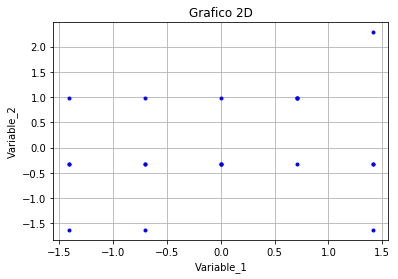

,Variable_1,Variable_2
0,0.000000,-0.326164
1,0.000000,-0.326164
2,0.000000,-0.326164
3,0.000000,0.978492
4,0.707107,-0.326164
5,0.707107,0.978492
6,0.707107,0.978492
7,0.707107,0.978492
8,-0.707107,-0.326164
9,-0.707107,0.978492


In [209]:
dataframe2 = pd.DataFrame(dataset2)

a = dataframe2[0]
b = dataframe2[1]
dataframe3 = {'Variable_1': a, 'Variable_2': b}
dataframe3 = pd.DataFrame(data=dataframe3)
#fig = plt.figure(figsize=(10,5))
plt.title('Grafico 2D')
plt.xlabel('Variable_1')
plt.ylabel('Variable_2')
plt.plot(dataframe3['Variable_1'],dataframe3['Variable_2'],'b.')

plt.grid(True)
plt.show()
dataframe3

#### Parte 4
Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara los resultados y coméntalos.

In [193]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(dataset3)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf)
print("")
print("")

df = DataFrame(index, columns = ['index'])
finalDf = pd.concat([principalDf, df[['index']]], axis = 1)
print(finalDf)
print("")
print("")

   principal component 1  principal component 2
0              -1.740814               3.315268
1               0.914320               0.272974
2              -0.849393              -2.439237
3              -3.106027              -1.242194
4               2.231788               0.343972
5              -0.788054               0.082155
6               3.338180              -0.332939


   principal component 1  principal component 2             index
0              -1.740814               3.315268              Tipo
1               0.914320               0.272974                PS
2              -0.849393              -2.439237            Ataque
3              -3.106027              -1.242194           Defensa
4               2.231788               0.343972   Ataque especial
5              -0.788054               0.082155  Defensa especial
6               3.338180              -0.332939         Velocidad


